# Neural Network to Recognise Hand Written Digits Using Keras

#### In this session, we will be using keras, a top level wrapper for Tensorflow to build Neural Networks that can classify hand-written digits.

## We will be building three types of networks :
* Feed-Forward Neural Network: This is a simple neural network with only dense connections
* Convolutional Neural Network: This is a more advanced network
* Transfer Learning: We will use a network trained on the ImageNet data and use it to classify MNIST data

## You will need :
* keras 
* matplotlib - Used for data visualisation
* numpy - Used for Matrix Operations

# Let's Get Started!

## Feed-Forward Neural Network

### Step 1: First we have to import all the packages that we need

In [5]:
import keras                         # Used for building the model and getting the MNIST data
from keras.datasets import mnist     # Used for downloading and using MNIST data
from keras.models import Sequential  # For building the model. Case Sensitive! 'S' is Capital!
from keras.layers import Dense       # For fully connected layer
from keras.optimizers import Adam    # Optimiser used for training

%matplotlib inline
import matplotlib.pyplot as plt      # For visualisations

### Step 2: Now we have to set up some Hyper Parameters

Hyper-parameters are certain constants in the neural network.
These include the learning rate, number of layers and number of neurons in each layer.
It is hard to know what the 'ideal' values of these hyper-parameters are, so we use certain rules-of-thumb and trial and error to select our hyper-parameters.
They can be adjusted to get different results from the neural network.

In [6]:
# We feed our data into the network in batches.
# We chose a batch size of 128 meaning each batch contains 128 images.
batch_size = 128   
# There are 10 digits, so we have 10 classes
num_classes = 10
# We will train our network for 5 epochs
epochs = 5

# MNIST images are of size 28x28 pixels
#These values will help us in plotting images
img_size = 28
img_shape = (img_size, img_size)

### Step 3: Create a Function to plot the images

In [7]:
def plot_images(images):
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Step 4: Download, Plot and Preprocess Images

The `load_data()` function is used to download the data.

It returns four numpy arrays containing both the training and the test data.

The 'x' values contain the images as a vector. Each image is 28x28 pixels in size, meaning that when unfolded into a vector, we get 784 values.

There are 60,000 train images and 10,000 test images.

The 'y' values are one-hot encoded vectors which gives us the corresponding class of the image in the 'x' arrays.

After downloading the images, we have to reshape the numpy array into the share that we want it to be in.

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

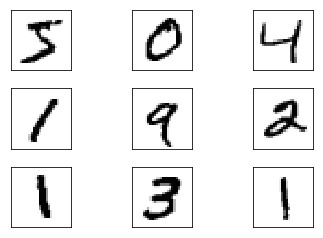

60000 train samples
10000 test samples


In [9]:
# Reshaping the data in the form we want.
# This will create 60,000 rows with each row containing 784 columns, each containing a pixel value
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convert the images into type float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Let's plot some of the images
plot_images(x_train[0:9])

# We normalise the images as it helps in training
# This means that we convert the pixel values (which are in the range 0-255) to a range (0-1).
# This is done by dividing it by 255
x_train /= 255
x_test /= 255

# Let's see how many train and testing samples we have
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

### Step 5: Now we convert the classes into One-Hot Encoded Vectors

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Step 6: Building the Neural Network!!!

The Model is built using the Sequential Function

We add layers to the model step by step.

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Step 7: Training the model

Now that we have our model built, we can start to train our model. This is done using the compile() function.

We use a categorical crossentropy loss function.
The optimiser we use is Adam.
And the metric that the neural network tries to optimise is the accuracy.

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.2166 - acc: 0.9355 - val_loss: 0.0980 - val_acc: 0.9712
Epoch 2/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0787 - acc: 0.9759 - val_loss: 0.0790 - val_acc: 0.9745
Epoch 3/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0511 - acc: 0.9836 - val_loss: 0.0664 - val_acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0352 - acc: 0.9884 - val_loss: 0.0728 - val_acc: 0.9776
Epoch 5/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0720 - val_acc: 0.9768


### Step 8: Now we can see our results!

In [13]:
## print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test accuracy: 0.9768


We got an appreciable accuracy of 97%+.
Let's see if we can improve it by using a convolutional nerual network

## Convolutional Neural Network

Now we will start to train a convolutional neural network.

### Step 9: Importing Modules

In [14]:
from keras.layers import Flatten   # This is used to get a vector of all the filter outputs
from keras.layers import Conv2D    # This is the Conv2D filter

### Step 10: Reshaping the Training Data

A Conv2D layer takes as input an image of shape:
No. of Rows x No. of Columns x No. of Channels

In our case, the number of channels is 1. In case of color images like the CIFAR-10 dataset, the number of channels will be 3 (Red, Green, Blue)

In [15]:
channels = 1

x_train = x_train.reshape(x_train.shape[0], img_size, img_size, channels)
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, channels)
input_shape = (img_size, img_size, channels)

### Step 11: Building the model

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 206s 3ms/step - loss: 0.1840 - acc: 0.9427 - val_loss: 0.0590 - val_acc: 0.9805
Epoch 2/2
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0412 - val_acc: 0.9864


### Step 12: Evaluating our model performance

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04115520673741121
Test accuracy: 0.9864
